# How Much of the World Has Access to the Internet?

### Author: Rachel Tong 
linkedin.com/in/rachelwtong

## 📖 Background
You work for a policy consulting firm. One of the firm's principals is preparing to give a presentation on the state of internet access in the world. She needs your help answering some questions about internet accessibility across the world.

## 💾 The data

#### The research team compiled the following tables ([source](https://ourworldindata.org/internet)):

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

#### broadband
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - "Internet." OurWorldInData.org._

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read the broadband table
broadband = pd.read_csv('data/broadband.csv')
broadband.head()

,Entity,Code,Year,Broadband_Subscriptions
0,Afghanistan,AFG,2004,0.000809
1,Afghanistan,AFG,2005,0.000858
2,Afghanistan,AFG,2006,0.001892
3,Afghanistan,AFG,2007,0.001845
4,Afghanistan,AFG,2008,0.001804


In [3]:
# Read the internet table
internet = pd.read_csv('data/internet.csv')
internet.head()

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.0
1,Afghanistan,AFG,1991,0.0
2,Afghanistan,AFG,1992,0.0
3,Afghanistan,AFG,1993,0.0
4,Afghanistan,AFG,1994,0.0


In [4]:
# Read the people table
people = pd.read_csv('data/people.csv')
people.head()

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0


# 1. Top 5 Countries with Highest Internet Usage

The definition of top 5 countries with highest internet usage can vary depending on what timeframe of data we choose to look at.

In [5]:
#Top 5 Countries in most recent data
top5_usage_2019 = internet[internet['Year']==2019].nlargest(5,'Internet_Usage')
print(top5_usage_2019)

                    Entity Code  Year  Internet_Usage
470                Bahrain  BHR  2019       99.701504
5388                 Qatar  QAT  2019       99.652804
3416                Kuwait  KWT  2019       99.542676
6716  United Arab Emirates  ARE  2019       99.149998
1552               Denmark  DNK  2019       98.046435


In [6]:
#Top 5 Countries over time from 1990 - 2019 
avg_usage = internet.groupby('Entity')['Internet_Usage'].agg([np.median,np.mean]).sort_values(by="median", ascending=False).head(6)
print(avg_usage)

                median       mean
Entity                           
Kosovo       86.668314  86.668314
Iceland      83.880000  62.293549
Sweden       82.010000  59.268944
Denmark      81.835000  58.460243
Norway       80.060000  61.851339
Netherlands  74.760000  57.863895


In [7]:
#Check Kosovo data population
kosovo = internet[internet['Entity'] == 'Kosovo']
print(kosovo)

#Kosovo only has two years of data. It should be removed from the top 5. 

      Entity      Code  Year  Internet_Usage
3385  Kosovo  OWID_KOS  2017       83.893597
3386  Kosovo  OWID_KOS  2018       89.443032


If we only focus on 2019, the top five countries with the highest usage are: 
1. Bahrain
2. Qatar
3. Kuwait
4. United Arab Emirates 
5. Denmark 

However, the dataset is not evenly populated over the years of 1990 - 2019. In the 1990s, the number of countries that had access to internet was likely low as developing countries lagged behind developed countries in terms of wireless infrastructure. To determine the top five countries of highest usage, we also have to take into account the data population for the countries. For that reason, Kosovo was removed from the top 5 results since it only had two years of data. The resulting top 5 over time is as follows: 

1. Iceland     
2. Sweden       
3. Denmark      
4. Norway       
5. Netherlands  

Text(0, 0.5, '% Population Using Internet in Last 3 Months')

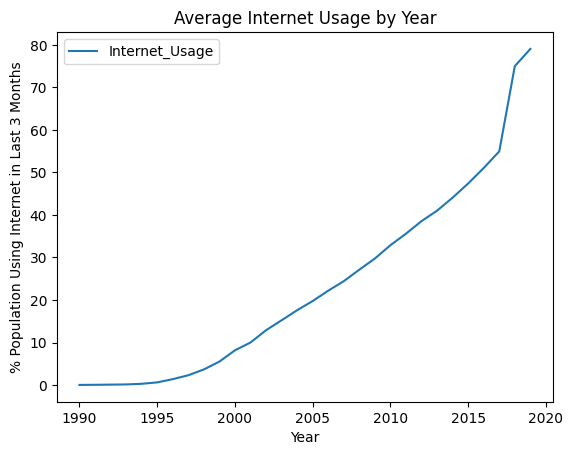

In [8]:
#Bonus: Looking at average internet usage over time reveals the rapid growth internet usage has seen, particularly after 2015 where the growth appears to be exponential.
avg_usage_by_year = internet.groupby('Year').mean()

avg_usage_by_year.plot()
plt.title('Average Internet Usage by Year')
plt.ylabel('% Population Using Internet in Last 3 Months')

# 2. Number of Users in the Top Five Countries in 2019

In [9]:
top_5 = ['Iceland','Sweden','Denmark','Norway','Netherlands']

users_2019 = people[(people['Entity'].isin(top_5)) & (people['Year'] == 2019)][['Entity','Users']].sort_values(by='Users',ascending=False)

print(users_2019)

           Entity     Users
4085  Netherlands  16197940
5515       Sweden   9702513
1565      Denmark   5682653
4355       Norway   5241320
2667      Iceland    357179


# 3. Top 5 Countries in Each Region
What are the top 5 countries with the highest internet use for each of the following regions: 'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'?

Regions are defined by the World Bank Country database table: "Class.xlsx"

In [34]:
regions = pd.read_excel('CLASS.xlsx')

In [11]:
regions.head()

,Economy,Code,Region,Income group,Lending category,Other (EMU or HIPC)
0,Aruba,ABW,Latin America & Caribbean,High income,NaN,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA,HIPC
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,NaN
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN,NaN


In [35]:
#Drop unnecessary columns
regions.drop(['Income group','Lending category','Other (EMU or HIPC)'],axis=1,inplace=True)

In [13]:
#Merge regions with internet table 
internet = internet.merge(regions,how="left",left_on='Entity',right_on='Economy')

In [36]:
internet['Region'].unique()

array(['South Asia', nan, 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America'],
      dtype=object)

In [14]:
internet.head()

,Entity,Code_x,Year,Internet_Usage,Economy,Code_y,Region
0,Afghanistan,AFG,1990,0.0,Afghanistan,AFG,South Asia
1,Afghanistan,AFG,1991,0.0,Afghanistan,AFG,South Asia
2,Afghanistan,AFG,1992,0.0,Afghanistan,AFG,South Asia
3,Afghanistan,AFG,1993,0.0,Afghanistan,AFG,South Asia
4,Afghanistan,AFG,1994,0.0,Afghanistan,AFG,South Asia


In [37]:
#Define function to pull top 5 countries with the highest internet usage
def region_top_5(region):
    top_5_region = internet[internet['Region']==region].groupby('Entity')['Internet_Usage'].median().nlargest(5)
    print('The ' + region + " region's top 5 internet users are:")
    print(top_5_region)
    print('\n')

In [38]:
region_list = ['Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia']

In [39]:
for i in region_list:
    region = i 
    region_top_5(i)

The Middle East & North Africa region's top 5 internet users are:
Entity
Malta                   37.515000
United Arab Emirates    35.065648
Kuwait                  24.426610
Israel                  23.982264
Qatar                   22.717571
Name: Internet_Usage, dtype: float64


The Latin America & Caribbean region's top 5 internet users are:
Entity
Cayman Islands         61.000000
Barbados               44.744814
Dominica               30.319613
Chile                  26.825845
Trinidad and Tobago    26.498017
Name: Internet_Usage, dtype: float64


The East Asia & Pacific region's top 5 internet users are:
Entity
Australia      63.000000
Japan          62.393930
New Zealand    61.405084
Singapore      60.000000
Malaysia       45.440718
Name: Internet_Usage, dtype: float64


The South Asia region's top 5 internet users are:
Entity
Maldives       6.282424
Pakistan       6.248325
Bhutan         3.502045
India          1.831313
Afghanistan    1.532074
Name: Internet_Usage, dtype: float6

# 4. Visualize Internet Usage in 5 Regions Over Time

In [19]:
#Pivot internet table to display internet usage by region over time
reg_ovtime = pd.pivot_table(internet, values='Internet_Usage',index='Year',columns='Region',aggfunc=np.median)

In [40]:
reg_ovtime.head()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1990,0.0,0.000000,0.0,0.0,0.361000,0.0,0.0
1991,0.0,0.000000,0.0,0.0,0.570386,0.0,0.0
1992,0.0,0.000000,0.0,0.0,0.915981,0.0,0.0
1993,0.0,0.056367,0.0,0.0,1.184558,0.0,0.0
1994,0.0,0.111035,0.0,0.0,2.378694,0.0,0.0


Text(0, 0.5, '% of Population Using Internet L3M')

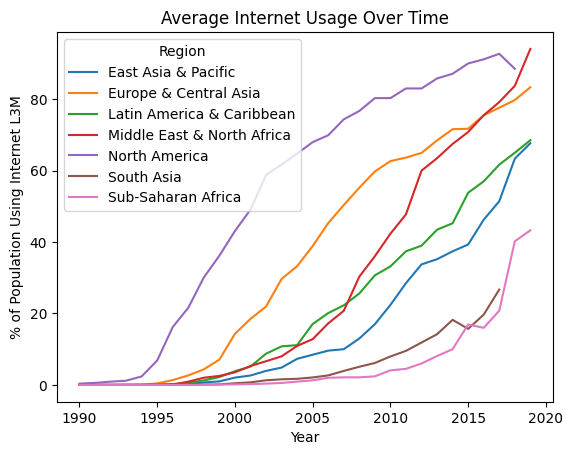

In [21]:
reg_ovtime.plot()
plt.title('Average Internet Usage Over Time')
plt.ylabel('% of Population Using Internet L3M')

North America's internet usage growth started taking off first among the regions prior to 1995. The rapid growth was followed by that of the Europe & Central Asia region. Sub-Saharan Africa experienced the internet boom the latest, with a rapid period of growth after 2015. 

# 5. Top 5 Countries with Most Users

In [41]:
#Understand the people data table
people.head()

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0


In [23]:
people.describe()

,Year,Users
count,6379.000000,6.379000e+03
mean,2004.733344,2.787634e+07
std,8.849845,1.834876e+08
min,1990.000000,0.000000e+00
25%,1997.000000,9.176000e+03
50%,2005.000000,2.282750e+05
75%,2012.000000,3.520350e+06
max,2020.000000,4.699888e+09


In [42]:
#Slice table for data in 2020 only
people_2020 = people[people['Year']==2020]

In [43]:
people_2020[people_2020['Code'].notna()].sort_values(by='Users',ascending=False).head(6)

,Entity,Code,Year,Users
6288,World,OWID_WRL,2020,4699887523
1231,China,CHN,2020,1003218650
2699,India,IND,2020,600446441
6049,United States,USA,2020,305371298
834,Brazil,BRA,2020,173419624
2730,Indonesia,IDN,2020,146059763


### Excluding World, the top 5 countries with the most users are: 

1. China
2. India
3. United States
4. Brazil
5. Indonesia 

These countries also have some of the largest populations in the world. 

# 6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019

In [26]:
broadband.head()

,Entity,Code,Year,Broadband_Subscriptions
0,Afghanistan,AFG,2004,0.000809
1,Afghanistan,AFG,2005,0.000858
2,Afghanistan,AFG,2006,0.001892
3,Afghanistan,AFG,2007,0.001845
4,Afghanistan,AFG,2008,0.001804


In [27]:
internet = internet.drop(columns=['Code_y','Economy'])

In [28]:
#Merge internet and broadband tables
internet_bb = internet.merge(broadband,how='left',left_on=['Entity','Year'],right_on=['Entity','Year'])
internet_bb.head()

,Entity,Code_x,Year,Internet_Usage,Region,Code,Broadband_Subscriptions
0,Afghanistan,AFG,1990,0.0,South Asia,NaN,NaN
1,Afghanistan,AFG,1991,0.0,South Asia,NaN,NaN
2,Afghanistan,AFG,1992,0.0,South Asia,NaN,NaN
3,Afghanistan,AFG,1993,0.0,South Asia,NaN,NaN
4,Afghanistan,AFG,1994,0.0,South Asia,NaN,NaN


In [29]:
internet_bb = internet_bb.drop(columns=['Code'])

In [30]:
internet_bb.head()

,Entity,Code_x,Year,Internet_Usage,Region,Broadband_Subscriptions
0,Afghanistan,AFG,1990,0.0,South Asia,NaN
1,Afghanistan,AFG,1991,0.0,South Asia,NaN
2,Afghanistan,AFG,1992,0.0,South Asia,NaN
3,Afghanistan,AFG,1993,0.0,South Asia,NaN
4,Afghanistan,AFG,1994,0.0,South Asia,NaN


<AxesSubplot: xlabel='Year'>

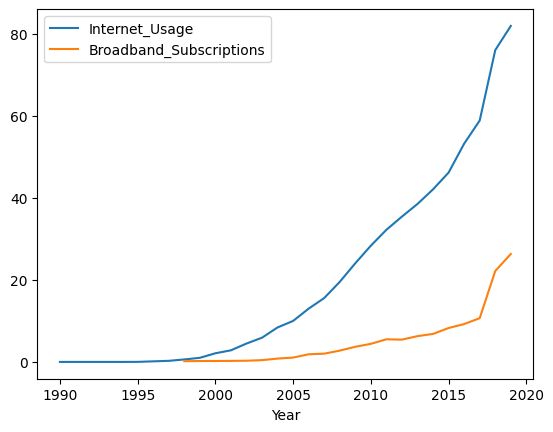

In [31]:
internet_bb.groupby('Year')['Internet_Usage','Broadband_Subscriptions'].agg(np.median).plot()

Internet growth proceded that of broadband subscriptions and significantly outpaces the adoption of broadband. Internet usage and broadband subscriptions both experienced exponential growth around 2017-2018. 

In [44]:
#Find correlation coefficient
internet_bb[internet_bb['Year']==2019].groupby('Year')['Internet_Usage','Broadband_Subscriptions'].corr()

Internet_Usage  Broadband_Subscriptions
Year                                                                 
2019 Internet_Usage                 1.000000                 0.559008
     Broadband_Subscriptions        0.559008                 1.000000

The correlation coefficient for Internet Usage and Broadband Subscriptions in 2019 is 0.56. The two variables are positively correlated but the strength of the relationship is moderate. 

# 7. Summary of Findings

Internet usage over the last 20 years has experienced tremendous growth around the world. While more developed regions such as North America and Europe were early adopters in the 1990s, recent years see countries in Middle East & Africa catching up and reaching 80%+ internet usage. 

Developing regions around the world including Sub-Saharan Africa and South Asia have also experienced a huge boom in internet usage around the 2010s, nearing 50% internet usage. 

Notably, while Scandinavian countries have the highest internet usage over time, countries in the Middle East have the proportion of their populations using the internet as of 2019.

While these countries have achieved high population adoption, the majority of the world's internet users come from the largest countries. Namely China, India, United States and Brazil. 

Broadband subscription in contrast has not enjoyed the same level of growth as internet usage, with average usage hovering around 20% in 2019 compared to internet usage's 80%.

As population in Sub-Saharan Africa and South Asia continue to grow and outpace developing countries, it will be interesting to observe the growth in internet usage as well over time. The increased adoption will likely mean greater connectivity to the world and opportunities as a result. Governments must proactively put the right infrastructure in place to allow for connectivity. Businesses will also be anxiously awaiting for the new opportunities that connectivity will bring for new markets and products. 